In [1]:
import pandas as pd

df_weather1 = pd.read_csv('data_weather.csv')
df_energy1 = pd.read_csv('data_energy.csv')

df_energy1.rename(columns={'Date': 'date'}, inplace=True)

print(df_weather1.head())
print(df_energy1.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
       LCLid        date     KWH
0  MAC000002  2012-10-12   7.098
1  MAC000002  2012-10-13  11.087
2  MAC000002  2012-10-14  13.223
3  MAC000002  2012-10-15  10.257
4  MAC000002  2012-10-16   9.769


In [2]:
# Removes rows with missing values
df_weather1 = df_weather1.dropna(subset=['max_temp', 'mean_temp', 'min_temp','date'])
df_energy1 = df_energy1.dropna(subset=['KWH'])

# Convert date format
df_energy1['date'] = pd.to_datetime(df_energy1['date'])
df_weather1['date'] = df_weather1['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

print(df_energy1.isnull().sum())
print(df_weather1.head())
print(df_energy1.head())


LCLid    0
date     0
KWH      0
dtype: int64
        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
       LCLid       date     KWH
0  MAC000002 2012-10-12   7.098
1  MAC000002 2012-10-13  11.087
2  MAC000002 2012-10-14  13.223
3  MAC000002 2012-10-15  10.257
4  MAC000002 2012-1

In [17]:
print(df_energy1['date'].dtype)
print(df_weather1['date'].dtype)

datetime64[ns]
datetime64[ns]


In [3]:
# Merge data by data
merged_data = pd.merge(df_energy1, df_weather1, on='date')
print(merged_data.head())

       LCLid       date     KWH  cloud_cover  sunshine  global_radiation  \
0  MAC000002 2012-10-12   7.098          5.0       6.4             106.0   
1  MAC000002 2012-10-13  11.087          4.0       4.1              85.0   
2  MAC000002 2012-10-14  13.223          1.0       7.7             113.0   
3  MAC000002 2012-10-15  10.257          6.0       0.6              44.0   
4  MAC000002 2012-10-16   9.769          4.0       7.3             107.0   

   max_temp  mean_temp  min_temp  precipitation  pressure  snow_depth  
0      13.5       12.3       9.7            0.0  100580.0         0.0  
1      12.9        9.6       5.6            0.8  100480.0         0.0  
2      14.2        7.4       1.9            0.0  100270.0         0.0  
3      15.9        8.6       2.9            1.4  100240.0         0.0  
4      17.5       12.1       8.3           12.0  100090.0         0.0  


In [ ]:

csv_file_path = 'merged_data.csv'
merged_data.to_csv(csv_file_path, index=False)


In [19]:
# Calculate average daily energy consumption
daily_energy = merged_data.groupby('date')['KWH'].mean().reset_index()
daily_data = pd.merge(daily_energy, df_weather1, on='date')

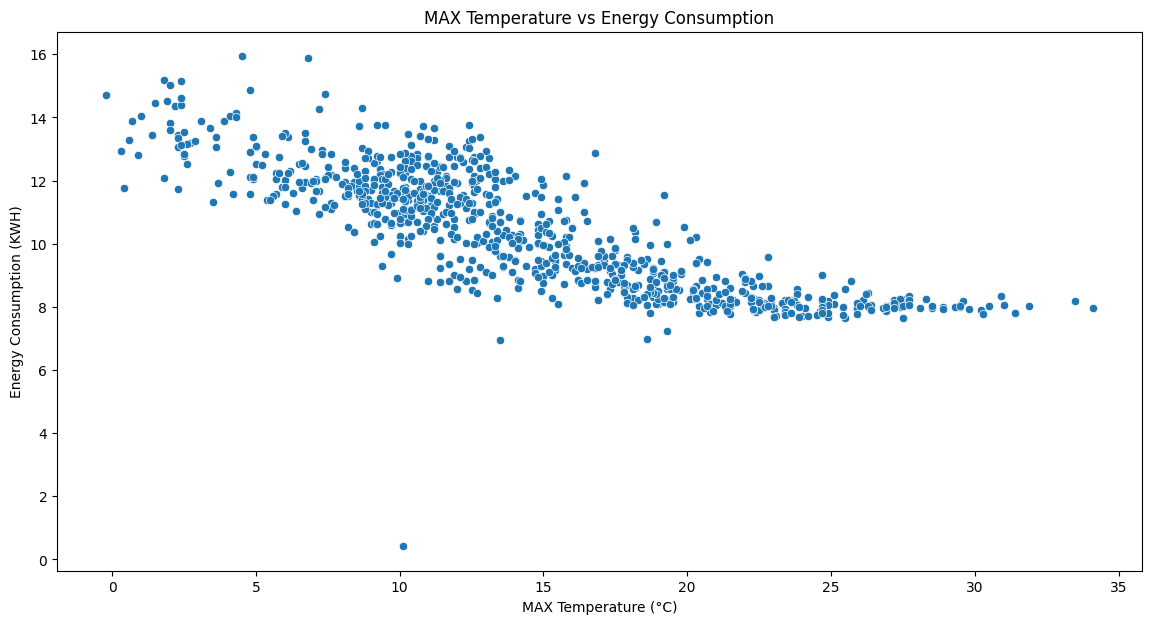

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between maximum temperature and energy consumption
plt.figure(figsize=(14, 7))
sns.scatterplot(x='max_temp', y='KWH', data=daily_data)
plt.title('MAX Temperature vs Energy Consumption')
plt.xlabel('MAX Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.show()

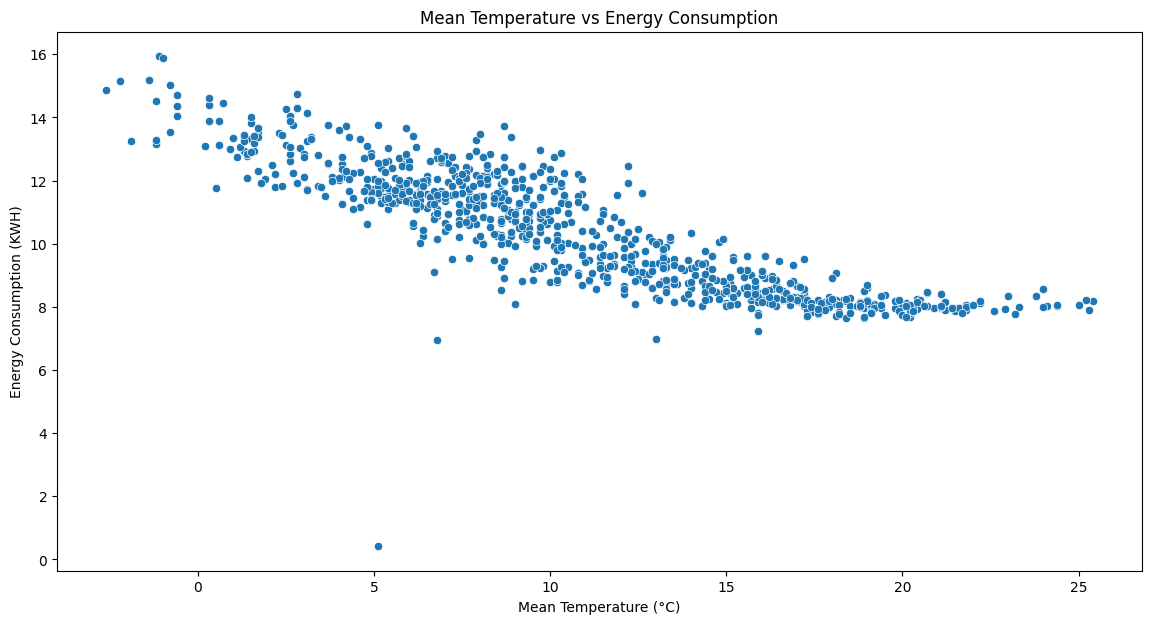

In [21]:
# Visualize the relationship between average temperature and energy consumption
plt.figure(figsize=(14, 7))
sns.scatterplot(x='mean_temp', y='KWH', data=daily_data)
plt.title('Mean Temperature vs Energy Consumption')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.show()

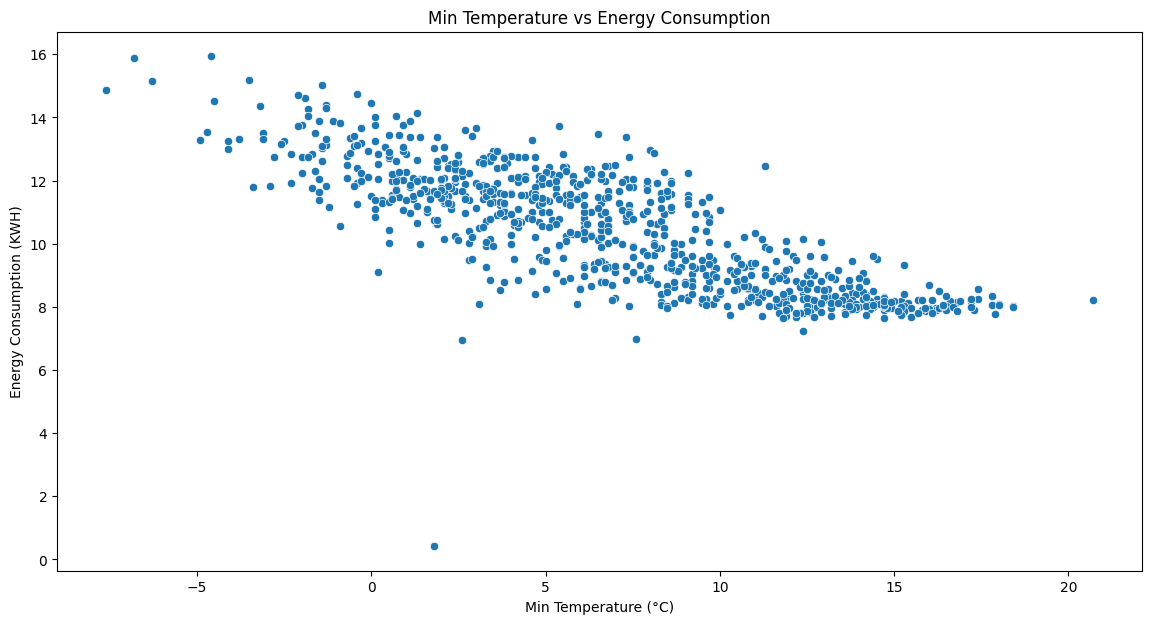

In [22]:

plt.figure(figsize=(14, 7))
sns.scatterplot(x='min_temp', y='KWH', data=daily_data)
plt.title('Min Temperature vs Energy Consumption')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.show()

In [23]:
max_mean_temp =  merged_data['mean_temp'].max()
min_mean_temp =  merged_data['mean_temp'].min()
average_mean_temp =  merged_data['mean_temp'].mean()

print(f"Mean Temperature - Maximum: {max_mean_temp}")
print(f"Mean Temperature - Minimum: {min_mean_temp}")
print(f"Mean Temperature - Average: {average_mean_temp}")

Mean Temperature - Maximum: 25.4
Mean Temperature - Minimum: -2.6
Mean Temperature - Average: 11.250780886574384


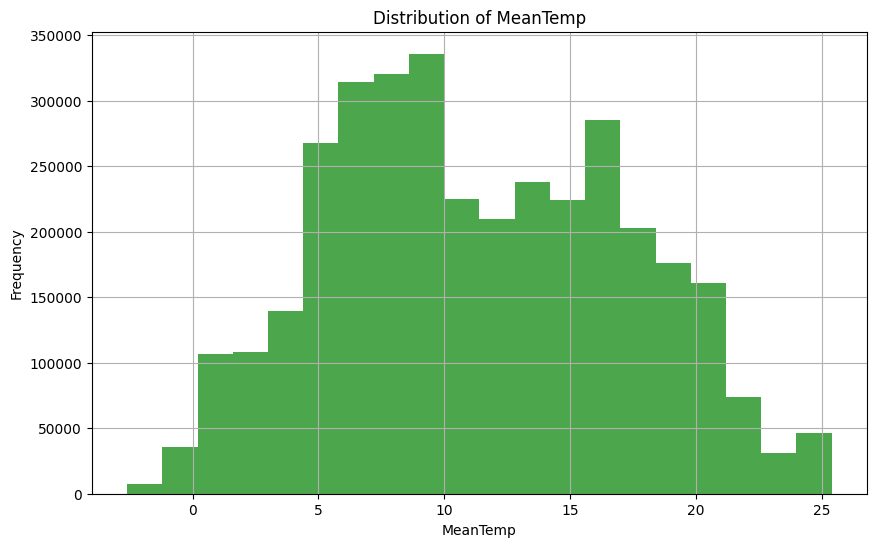

In [65]:
# Plot a histogram of the average temperature
plt.figure(figsize=(10, 6))
plt.hist(merged_data['mean_temp'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of MeanTemp')
plt.xlabel('MeanTemp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [66]:
import numpy as np

base_temp = 10

# HDD and CDD
cold_days = merged_data[merged_data['mean_temp'] < base_temp]
hot_days = merged_data[merged_data['mean_temp'] > base_temp]



Simple linear regression

In [67]:
from sklearn.linear_model import LinearRegression

# The influence of average temperature in cold days on household electricity consumption was studied
X_cold = cold_days['mean_temp'].values.reshape(-1, 1)
y_cold = cold_days['KWH'].values
cold_model = LinearRegression()
cold_model.fit(X_cold, y_cold)

# The influence of average temperature in hot days on household electricity consumption was studied
X_hot = hot_days['mean_temp'].values.reshape(-1, 1)
y_hot = hot_days['KWH'].values
hot_model = LinearRegression()
hot_model.fit(X_hot, y_hot)

LinearRegression()

In [68]:
# Print the coefficients of the regression model
print(f'Cold Days Model Coefficients: {cold_model.coef_}')
print(f'Cold Days Model Intercept: {cold_model.intercept_}')
print(f'Hot Days Model Coefficients: {hot_model.coef_}')
print(f'Hot Days Model Intercept: {hot_model.intercept_}')

Cold Days Model Coefficients: [-0.26751888]
Cold Days Model Intercept: 13.296759132017069
Hot Days Model Coefficients: [-0.17009292]
Hot Days Model Intercept: 11.44318229029281


In [69]:
from sklearn.metrics import r2_score  

cold_predictions = cold_model.predict(X_cold)
cold_r2 = r2_score(y_cold, cold_predictions)

hot_predictions = hot_model.predict(X_hot)
hot_r2 = r2_score(y_hot, hot_predictions)

print(f'Cold Days Model R²: {cold_r2}')
print(f'Hot Days Model R²: {hot_r2}')

Cold Days Model R²: 0.004465334984727565
Hot Days Model R²: 0.0075675667287360415


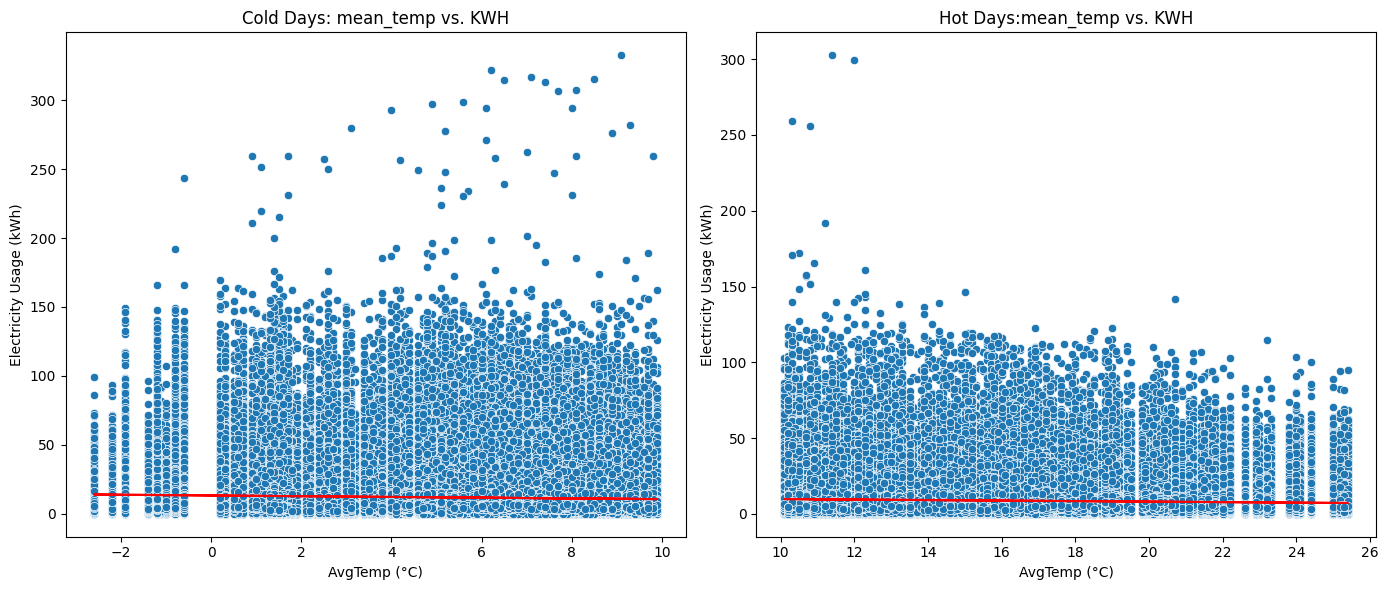

In [70]:
# Plot the effect of average temperature on household electricity consumption on cold days
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=cold_days['mean_temp'], y=cold_days['KWH'])
plt.plot(cold_days['mean_temp'], cold_model.predict(X_cold), color='red')
plt.title('Cold Days: mean_temp vs. KWH')
plt.xlabel('AvgTemp (°C)')
plt.ylabel('Electricity Usage (kWh)')

# Plot the effect of average temperature on household electricity consumption on hot days
plt.subplot(1, 2, 2)
sns.scatterplot(x=hot_days['mean_temp'], y=hot_days['KWH'])
plt.plot(hot_days['mean_temp'], hot_model.predict(X_hot), color='red')
plt.title('Hot Days:mean_temp vs. KWH')
plt.xlabel('AvgTemp (°C)')
plt.ylabel('Electricity Usage (kWh)')

plt.tight_layout()
plt.show()

Polynomial regression

In [71]:

from sklearn.preprocessing import PolynomialFeatures
degree = 2

poly_features_cold = PolynomialFeatures(degree=degree)
X_cold_poly = poly_features_cold.fit_transform(X_cold)
cold_poly_model = LinearRegression()
cold_poly_model.fit(X_cold_poly, y_cold)

poly_features_hot = PolynomialFeatures(degree=degree)
X_hot_poly = poly_features_hot.fit_transform(X_hot)
hot_poly_model = LinearRegression()
hot_poly_model.fit(X_hot_poly, y_hot)

LinearRegression()

In [74]:

print(f'Cold Days Polynomial Model Coefficients: {cold_poly_model.coef_}')
print(f'Cold Days Polynomial Model Intercept: {cold_poly_model.intercept_}')
print(f'Hot Days Polynomial Model Coefficients: {hot_poly_model.coef_}')
print(f'Hot Days Polynomial Model Intercept: {hot_poly_model.intercept_}')

Cold Days Polynomial Model Coefficients: [ 0.         -0.35503883  0.00872363]
Cold Days Polynomial Model Intercept: 13.444168268305862
Hot Days Polynomial Model Coefficients: [ 0.         -0.74042598  0.0172237 ]
Hot Days Polynomial Model Intercept: 15.934490498784601


In [75]:
cold_predictions_poly = cold_poly_model.predict(X_cold_poly)
cold_r2_poly = r2_score(y_cold, cold_predictions_poly)

hot_predictions_poly = hot_poly_model.predict(X_hot_poly)
hot_r2_poly = r2_score(y_hot, hot_predictions_poly)

print(f'Cold Days Model R²: {cold_r2_poly}')
print(f'Hot Days Model R²: {hot_r2_poly}')

Cold Days Model R²: 0.004510369570406847
Hot Days Model R²: 0.008893487638142017


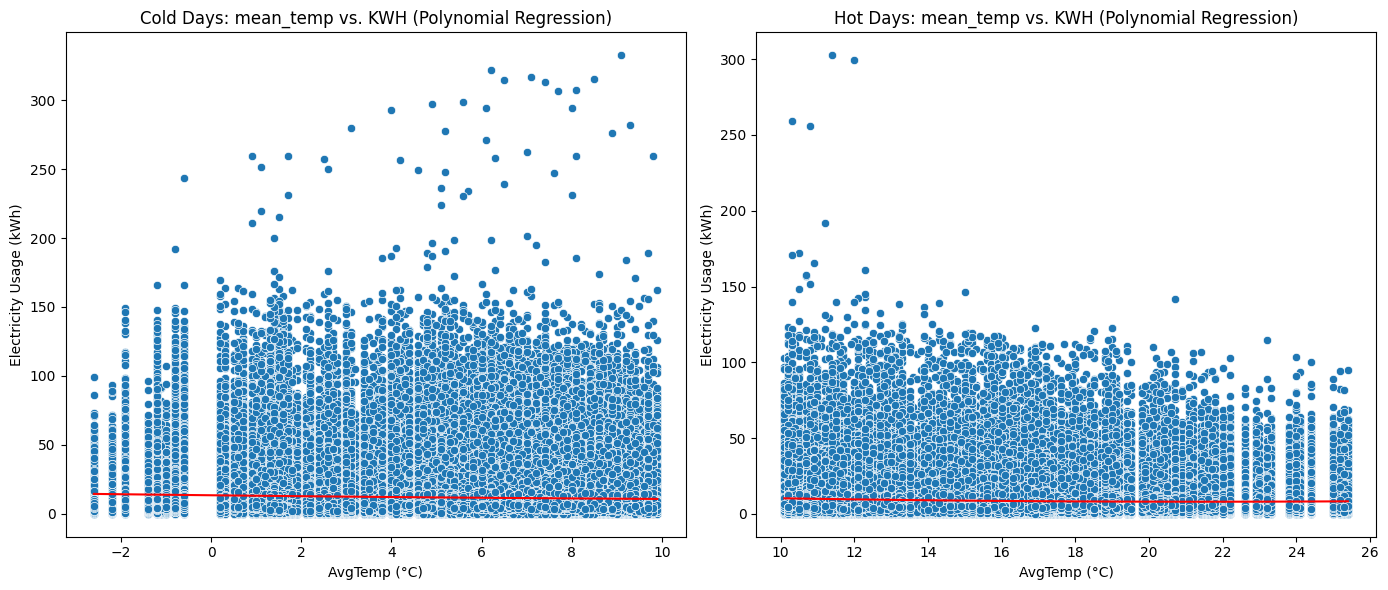

In [76]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=cold_days['mean_temp'], y=cold_days['KWH'])
X_cold_range = np.linspace(X_cold.min(), X_cold.max(), 100).reshape(-1, 1)
X_cold_range_poly = poly_features_cold.transform(X_cold_range)
plt.plot(X_cold_range, cold_poly_model.predict(X_cold_range_poly), color='red')
plt.title('Cold Days: mean_temp vs. KWH (Polynomial Regression)')
plt.xlabel('AvgTemp (°C)')
plt.ylabel('Electricity Usage (kWh)')


plt.subplot(1, 2, 2)
sns.scatterplot(x=hot_days['mean_temp'], y=hot_days['KWH'])
X_hot_range = np.linspace(X_hot.min(), X_hot.max(), 100).reshape(-1, 1)
X_hot_range_poly = poly_features_hot.transform(X_hot_range)
plt.plot(X_hot_range, hot_poly_model.predict(X_hot_range_poly), color='red')
plt.title('Hot Days: mean_temp vs. KWH (Polynomial Regression)')
plt.xlabel('AvgTemp (°C)')
plt.ylabel('Electricity Usage (kWh)')

plt.tight_layout()
plt.show()